In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('SuperMart Retail.csv')
df = data.copy()

In [3]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

#### Understanding of problem statement and dataset
How features affect the weekly sales:


**Temperature**:  Hot or cold weather can affect what people buy. During colder months, sales of winter clothing and warm drinks may increase. In hot weather, sales of ice cream and cold beverages may go up. Extreme temperatures can also change how much people shop in stores or online.



**Unemployment**:  When many people are unemployed, they may have less money to spend, and this can lead to lower sales. People might focus more on buying essential items and cut back on luxury items. In areas with high unemployment rates, stores may see fewer customers and lower sales.



**Fuel Price**:  Changes in fuel prices can impact how much it costs to transport goods to stores. High fuel prices can lead to increased transportation expenses for retailers, which might affect product prices. It can also influence how much people travel to go shopping.



**Consumer Price Index (CPI)**:  The CPI shows how much the cost-of-living changes over time. When the CPI goes up, things can become more expensive. This might affect how much people spend on various items and impact sales.



**Holiday Occurrence**: During holidays, people often spend more on gifts and celebrations, leading to higher sales for retailers. Stores may offer special discounts and promotions to attract shoppers during holiday seasons.



**Store Number**:  Different stores may have different sales because of their locations and the type of customers they serve. Some stores might be in busier areas or have more competition nearby, which can affect their weekly sales.



**Date**: Dates and special occasions can influence sales. For example, sales may increase during festive periods and events. Economic factors, such as paydays or tax refund periods, can also impact spending and weekly sales.

In [4]:
df.shape

(6435, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [8]:
cols = list(df.columns)
cols

['Store',
 'Date',
 'Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment']

In [9]:
for i in range(len(cols)):
  print(cols[i],':')
  print(df[cols[i]].unique())
  print('Number of unique values :')
  print(df[cols[i]].nunique())
  print('----------------------------------------------------------------------------')

Store :
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Number of unique values :
45
----------------------------------------------------------------------------
Date :
['05-02-2010' '12-02-2010' '19-02-2010' '26-02-2010' '05-03-2010'
 '12-03-2010' '19-03-2010' '26-03-2010' '02-04-2010' '09-04-2010'
 '16-04-2010' '23-04-2010' '30-04-2010' '07-05-2010' '14-05-2010'
 '21-05-2010' '28-05-2010' '04-06-2010' '11-06-2010' '18-06-2010'
 '25-06-2010' '02-07-2010' '09-07-2010' '16-07-2010' '23-07-2010'
 '30-07-2010' '06-08-2010' '13-08-2010' '20-08-2010' '27-08-2010'
 '03-09-2010' '10-09-2010' '17-09-2010' '24-09-2010' '01-10-2010'
 '08-10-2010' '15-10-2010' '22-10-2010' '29-10-2010' '05-11-2010'
 '12-11-2010' '19-11-2010' '26-11-2010' '03-12-2010' '10-12-2010'
 '17-12-2010' '24-12-2010' '31-12-2010' '07-01-2011' '14-01-2011'
 '21-01-2011' '28-01-2011' '04-02-2011' '11-02-2011' '18-02-2011'
 '25-02-2011' '

there is no invalid entries

In [10]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment  
count  6435.000000   6435.000000  
mean    171.578394      7.999151  
std      39.356712      1.875885  
min     126.064000      3.879000  
25%     131.735000      6.891000  
50%     182.616521      7.874000  
75%     212.743293      8.622000  
max     227.232807     14.313000

In [11]:
df['Store'].value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

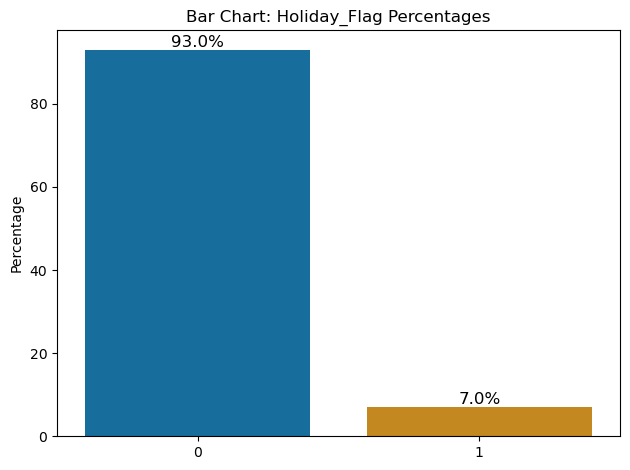

In [12]:
counts = df['Holiday_Flag'].value_counts()

# Calculate percentage for each category
total_counts = len(df)
percentages = (counts / total_counts) * 100

# Plot the bar chart with category and percentage labels using Seaborn
sns.barplot(x=percentages.index, y=percentages.values, palette='colorblind')
ax = plt.gca()  # Get the current axes
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%',  # Format the percentage to 1 decimal place
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=12)

plt.xlabel('')
plt.ylabel('Percentage')
plt.title(f'Bar Chart: Holiday_Flag Percentages')

plt.tight_layout()
plt.show()

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtype

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specif

dtype('<M8[ns]')

In [14]:
date_as_col = df.copy()

In [15]:
df.index = df['Date']
# df.drop('Date',axis=1,inplace=True)
df.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
Date                                                                    
2010-05-02      1 2010-05-02    1643690.90             0        42.31   
2010-12-02      1 2010-12-02    1641957.44             1        38.51   
2010-02-19      1 2010-02-19    1611968.17             0        39.93   
2010-02-26      1 2010-02-26    1409727.59             0        46.63   
2010-05-03      1 2010-05-03    1554806.68             0        46.50   

            Fuel_Price         CPI  Unemployment  
Date                                              
2010-05-02       2.572  211.096358         8.106  
2010-12-02       2.548  211.242170         8.106  
2010-02-19       2.514  211.289143         8.106  
2010-02-26       2.561  211.319643         8.106  
2010-05-03       2.625  211.350143         8.106

#### Avg. Unemployment rate for each store

<AxesSubplot:xlabel='Store'>

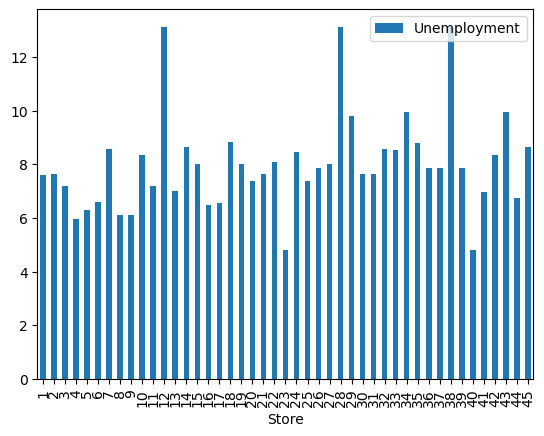

In [16]:
df.groupby('Store')[['Unemployment']].mean().plot(kind='bar')

#### is there any trend in temperature ?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

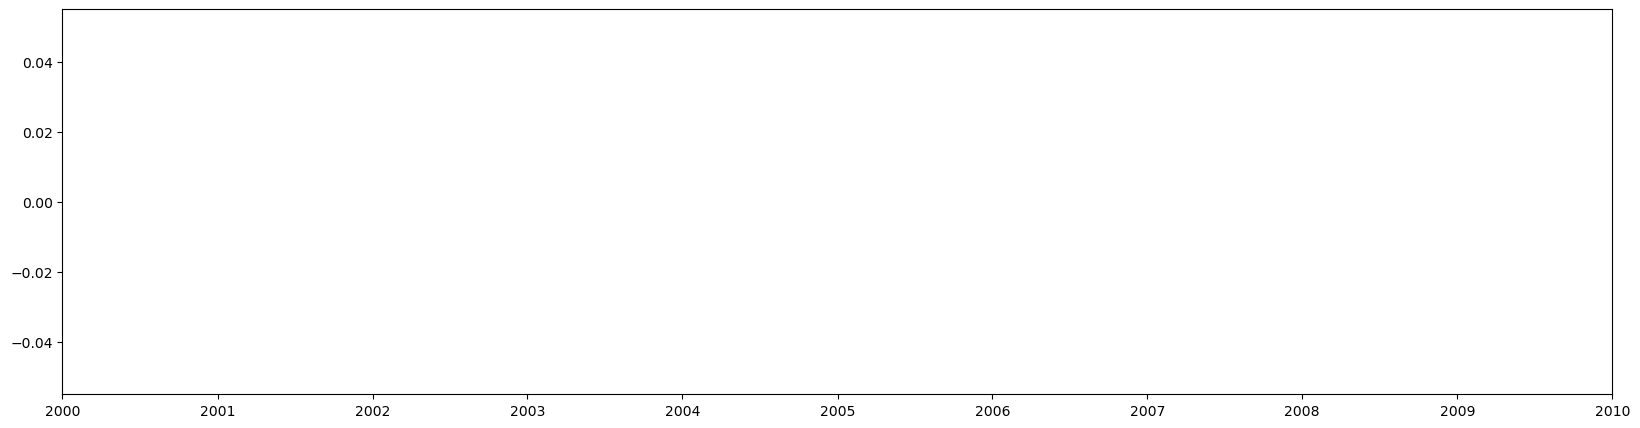

In [18]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x=df.index,y='Temperature',ci=None)
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x=df.index,y='Temperature',ci=None,hue='Store')
plt.show()

In [ ]:
# Temp vs Sale
sns.scatterplot(data=df,x='Temperature',y='Weekly_Sales')

In [ ]:
df[['Temperature','Weekly_Sales']].corr()

### Fuel Prices

In [ ]:
# Fuel Prices vs Sale
sns.scatterplot(data=df,x='Fuel_Price',y='Weekly_Sales')

In [ ]:
df[['Fuel_Price','Weekly_Sales']].corr()

#### Making categories of Temperature, Unemployment and Fuel Price as low, medium and high

In [ ]:
df.Fuel_Price.describe()

In [ ]:
q1 = df.Fuel_Price.quantile(0.25)
q3 = df.Fuel_Price.quantile(0.75)

def fun(val):
  if val < q1:
    return 'low'
  elif val>q3:
    return 'high'
  else:
    return 'medium'
df['Fuel_cat'] = df['Fuel_Price'].map(fun)

In [ ]:
df.groupby('Fuel_cat')[['Weekly_Sales']].mean().plot(kind='bar')

In [ ]:
import pandas as pd
from scipy.stats import f_oneway


anova_results = {}

# Group the data by 'Fuel_cat' and extract the 'Weekly_Sales' for each store
grouped_data = df.groupby('Fuel_cat')['Weekly_Sales']

# Iterate through each group (Fuel categories) and perform the ANOVA test
for store, sales in grouped_data:
    anova_results[store] = sales.values

# Perform the ANOVA test
anova_statistic, p_value = f_oneway(*anova_results.values())

# Print the ANOVA results
print("ANOVA Statistic:", anova_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test suggests that there are significant differences in weekly sales between different Fuel categories.")
else:
    print("The ANOVA test does not suggest significant differences in weekly sales between different Fuel categories.")


##### 2. Temperature

In [ ]:
q1 = df.Temperature.quantile(0.25)
q3 = df.Temperature.quantile(0.75)

def fun(val):
  if val < q1:
    return 'low'
  elif val>q3:
    return 'high'
  else:
    return 'medium'
df['Temperature_cat'] = df['Temperature'].map(fun)

In [ ]:
df.groupby('Temperature_cat')[['Weekly_Sales']].mean().plot(kind='bar')

In [ ]:
anova_results = {}

# Group the data by 'Temperature_cat' and extract the 'Weekly_Sales' for each store
grouped_data = df.groupby('Temperature_cat')['Weekly_Sales']

# Iterate through each group (Temperature_cat) and perform the ANOVA test
for store, sales in grouped_data:
    anova_results[store] = sales.values

# Perform the ANOVA test
anova_statistic, p_value = f_oneway(*anova_results.values())

# Print the ANOVA results
print("ANOVA Statistic:", anova_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test suggests that there are significant differences in weekly sales between different Temperature categories.")
else:
    print("The ANOVA test does not suggest significant differences in weekly sales between different Temperature categories.")


##### 3.Unemployment

In [ ]:
q1 = df.Unemployment.quantile(0.25)
q3 = df.Unemployment.quantile(0.75)

def fun(val):
  if val < q1:
    return 'low'
  elif val>q3:
    return 'high'
  else:
    return 'medium'
df['Unemployment_cat'] = df['Unemployment'].map(fun)

In [ ]:
df.groupby('Unemployment_cat')[['Weekly_Sales']].mean().plot(kind='bar')

In [ ]:
anova_results = {}

# Group the data by 'Unemployment_cat' and extract the 'Weekly_Sales' for each store
grouped_data = df.groupby('Unemployment_cat')['Weekly_Sales']

# Iterate through each group (Unemployment_cat) and perform the ANOVA test
for store, sales in grouped_data:
    anova_results[store] = sales.values

# Perform the ANOVA test
anova_statistic, p_value = f_oneway(*anova_results.values())

# Print the ANOVA results
print("ANOVA Statistic:", anova_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test suggests that there are significant differences in weekly sales between different Unemployment categories.")
else:
    print("The ANOVA test does not suggest significant differences in weekly sales between different Unemployment categories.")


#### Trend of Fuel Prices over time


In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x=df.index,y='Fuel_Price',ci=None)

#### is there significant differences in weekly sales between different stores ?

In [ ]:
import pandas as pd
from scipy.stats import f_oneway


anova_results = {}

# Group the data by 'Store' and extract the 'Weekly_Sales' for each store
grouped_data = df.groupby('Store')['Weekly_Sales']

# Iterate through each group (store) and perform the ANOVA test
for store, sales in grouped_data:
    anova_results[store] = sales.values

# Perform the ANOVA test
anova_statistic, p_value = f_oneway(*anova_results.values())

# Print the ANOVA results
print("ANOVA Statistic:", anova_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test suggests that there are significant differences in weekly sales between different stores.")
else:
    print("The ANOVA test does not suggest significant differences in weekly sales between different stores.")


In [ ]:
import pandas as pd
from scipy.stats import f_oneway


anova_results = {}

# Group the data by 'Store' and extract the 'Fuel_Price' for each store
grouped_data = df.groupby('Store')['Fuel_Price']

# Iterate through each group (store) and perform the ANOVA test
for store, sales in grouped_data:
    anova_results[store] = sales.values

# Perform the ANOVA test
anova_statistic, p_value = f_oneway(*anova_results.values())

# Print the ANOVA results
print("ANOVA Statistic:", anova_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test suggests that there are significant differences in Fuel_Price between different stores.")
else:
    print("The ANOVA test does not suggest significant differences in Fuel_Price between different stores.")


In [ ]:
import pandas as pd
from scipy.stats import f_oneway


anova_results = {}

# Group the data by 'Store' and extract the 'Temperature' for each store
grouped_data = df.groupby('Store')['Temperature']

# Iterate through each group (store) and perform the ANOVA test
for store, sales in grouped_data:
    anova_results[store] = sales.values

# Perform the ANOVA test
anova_statistic, p_value = f_oneway(*anova_results.values())

# Print the ANOVA results
print("ANOVA Statistic:", anova_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test suggests that there are significant differences in Temperatures between different stores.")
else:
    print("The ANOVA test does not suggest significant differences in Temperatures between different stores.")


In [ ]:
df.columns

In [ ]:
import pandas as pd
from scipy.stats import f_oneway


anova_results = {}

# Group the data by 'Store' and extract the 'CPI' for each store
grouped_data = df.groupby('Store')['CPI']

# Iterate through each group (store) and perform the ANOVA test
for store, sales in grouped_data:
    anova_results[store] = sales.values

# Perform the ANOVA test
anova_statistic, p_value = f_oneway(*anova_results.values())

# Print the ANOVA results
print("ANOVA Statistic:", anova_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test suggests that there are significant differences in CPI between different stores.")
else:
    print("The ANOVA test does not suggest significant differences in CPI between different stores.")


In [ ]:
import pandas as pd
from scipy.stats import f_oneway


anova_results = {}

# Group the data by 'Store' and extract the 'Unemployment' for each store
grouped_data = df.groupby('Store')['Unemployment']

# Iterate through each group (store) and perform the ANOVA test
for store, sales in grouped_data:
    anova_results[store] = sales.values

# Perform the ANOVA test
anova_statistic, p_value = f_oneway(*anova_results.values())

# Print the ANOVA results
print("ANOVA Statistic:", anova_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test suggests that there are significant differences in Unemployment between different stores.")
else:
    print("The ANOVA test does not suggest significant differences in Unemployment between different stores.")


#### Trend of Average sales over time

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df,x=df.index,y='Weekly_Sales',ci=None)

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x=df.index,y='Weekly_Sales',ci=None,hue='Store')

#### Trend of CPI over time

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x=df.index,y='CPI',ci=None)

#### Trend of temperature

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(data=df,x=df.index,y='Temperature',ci=None)

#### Comparision of stores based on weekly sales

In [ ]:
df3 = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].agg('mean').reset_index())

In [ ]:
q1 = df3['Weekly_Sales'].quantile(0.25)
q3 = df3['Weekly_Sales'].quantile(0.75)
print('UnderPerforming Store are :',list(df3[df3['Weekly_Sales']<q1].reset_index()['Store']))
print('overPerforming Store are :',list(df3[df3['Weekly_Sales']>q3].reset_index()['Store']))

In [ ]:
df.groupby('Store')['Weekly_Sales'].agg('mean').sort_values().plot(kind='bar')

It may depends on location of store also

#### Comparision of weekly sales on holiday week and non holiday week

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='Store',y='Weekly_Sales',hue='Holiday_Flag')

In [ ]:
df.columns

In [ ]:
# Temp, sales, unemployment, cpi
df.groupby('Store')[['Temperature','Fuel_Price','Unemployment']].agg('mean').plot(kind='bar')
# df.groupby('Store')['Temperature'].agg('mean').sort_values().plot(kind='bar')

##### Correlation

In [ ]:
df.columns

In [ ]:
sns.heatmap(df[['Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']].corr(),annot=True)

#### Step 3

##### Round off sales values to multiples of millions for analysis and forecasts

In [ ]:
# Round off 'Weekly_Sales' to multiples of millions
df['Weekly_Sales'] = df['Weekly_Sales'] / 1e6

In [ ]:
df.head()

##### Bin the temperature data into 5 weather conditions: Freezing, Cold, Mild, Warm, and Hot.

In [ ]:
df.Temperature.describe()

1.Freezing: Temperatures less than or equal to 32°F (0°C)

2.Cold: Temperatures between 32°F (0°C) and 50°F (10°C)

3.Mild: Temperatures between 50°F (10°C) and 65°F (18.33°C)

4.Warm: Temperatures between 65°F (18.33°C) and 85°F (29.44°C)

5.Hot: Temperatures above 85°F (29.44°C)

In [ ]:
# Define the bin edges and labels for the weather conditions
bin_edges = [-float('inf'), 32, 50, 65, 85, float('inf')]
labels = ['Freezing', 'Cold', 'Mild', 'Warm', 'Hot']

# Create a new column 'Weather_Condition' based on the bins
df['Weather_Condition'] = pd.cut(df['Temperature'], bins=bin_edges, labels=labels)


In [ ]:
df.head()

In [ ]:
df.Weather_Condition.value_counts()

In [ ]:
anova_results = {}

# Group the data by 'Weather_Condition' and extract the 'Weekly_Sales' for each store
grouped_data = df.groupby('Weather_Condition')['Weekly_Sales']

# Iterate through each group (Weather_Condition) and perform the ANOVA test
for store, sales in grouped_data:
    anova_results[store] = sales.values

# Perform the ANOVA test
anova_statistic, p_value = f_oneway(*anova_results.values())

# Print the ANOVA results
print("ANOVA Statistic:", anova_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test suggests that there are significant differences in weekly sales between different Weather_Condition.")
else:
    print("The ANOVA test does not suggest significant differences in weekly sales between different Weather_Condition.")


#### Bin the unemployment data into 3 levels: <4, 4-11, >11.

In [ ]:
bin_edges = [-float('inf'), 4, 11, float('inf')]
labels = ['<4', '4-11', '>11']

# Create a new column 'Unemployment_Level' based on the bins
df['Unemployment_Level'] = pd.cut(df['Unemployment'], bins=bin_edges, labels=labels)


In [ ]:
df.Unemployment_Level.value_counts()

In [ ]:
anova_results = {}

# Group the data by 'Unemployment_Level' and extract the 'Weekly_Sales' for each store
grouped_data = df.groupby('Unemployment_Level')['Weekly_Sales']

# Iterate through each group (Unemployment_Level) and perform the ANOVA test
for store, sales in grouped_data:
    anova_results[store] = sales.values

# Perform the ANOVA test
anova_statistic, p_value = f_oneway(*anova_results.values())

# Print the ANOVA results
print("ANOVA Statistic:", anova_statistic)
print("P-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("The ANOVA test suggests that there are significant differences in weekly sales between different Unemployment_Level.")
else:
    print("The ANOVA test does not suggest significant differences in weekly sales between different Unemployment_Level.")


#### Aggregate the fuel price data into multiples of 0.1 currency units.

In [ ]:
df['Fuel_Price'] = df['Fuel_Price']*10

In [ ]:
df.head()

### Step 4

##### Visualize CPI variation for each store.

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Use Seaborn to create the line plot
sns.lineplot(data=df, x='Date', y='CPI', hue='Store')

# Set plot properties (title, labels, etc.)
plt.title('CPI Variation for Each Store')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.legend(title='Store')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
df.CPI.describe()

In [ ]:
# Convert the 'Date' column to datetime type (if not already done)
# df['Date'] = pd.to_datetime(df['Date'])

# Group the data by month and calculate the rounded mean for each month
df['CPI_Rounded_Mean'] = df.groupby(df['Date'].dt.to_period('M'))['CPI'].transform(lambda x: round(x.mean(), 2))


In [ ]:
df[['CPI_Rounded_Mean','CPI']]

In [ ]:
# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Use Seaborn to create the line plot
sns.lineplot(data=df, x='Date', y='CPI_Rounded_Mean', hue='Store')

# Set plot properties (title, labels, etc.)
plt.title('CPI_Rounded_Mean Variation for Each Store')
plt.xlabel('Date')
plt.ylabel('CPI_Rounded_Mean')
plt.legend(title='Store')

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


#### Step 5

In [ ]:
# Forecasting each feature
dfs1 = df[df['Store']==1]
dfs1.head()

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(dfs1['CPI'])

In [ ]:
dfs1['CPI First Difference'] = dfs1['CPI'] - dfs1['CPI'].shift(1)

In [ ]:
adfuller_test(dfs1['CPI First Difference'].dropna())

In [ ]:
dfs1['CPI First Difference'].plot()

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dfs1['CPI First Difference'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dfs1['CPI First Difference'].iloc[2:],lags=40,ax=ax2)

In [ ]:
p=3
q=2
d=1

from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['CPI'],order=(p,d,q))
model_fit=model.fit()

In [ ]:
model_fit.summary()

In [ ]:
dfs1['forecast']=model_fit.predict(start=100,end=143,dynamic=True)
dfs1[['CPI','forecast']].plot(figsize=(12,8))

In [ ]:
model=sm.tsa.statespace.SARIMAX(dfs1['CPI'],order=(p, d, q),seasonal_order=(p,d,q,5))
results=model.fit()

In [ ]:
dfs1['forecast']=results.predict(start=100,end=143,dynamic=True)
dfs1[['CPI','forecast']].plot(figsize=(12,8))

#### Forecasting Temperature

In [ ]:
# Forecasting for store 1
dfs1 = df[df['Store']==1]
dfs1.head()

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(dfs1['Temperature'])

In [ ]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dfs1['Temperature'].iloc[2:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dfs1['Temperature'].iloc[2:],lags=40,ax=ax2)

In [ ]:
p=7
q=2
d=0

In [ ]:
dfs1.shape

In [ ]:
length_train=100
train = dfs1[]

In [ ]:
# Simple moving average
y_moving = dfs1.copy()
length_train=100

window = 9
y_moving["moving_average_forecast_temp"] = dfs1['Temperature'].rolling(window).mean()
y_moving['moving_average_forecast_temp'][length_train:] = y_moving['moving_average_forecast_temp'][length_train-1]

In [ ]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple moving Average Method')
plt.show()

In [ ]:
dfs1.tail()

In [ ]:
dfs1['Date'].sort_values()

In [ ]:
last_date = dfs1['Date'].max()

# Filter data for historical observations up to the last date
historical_data = dfs1[dfs1['Date'] <= last_date]

# Calculate the simple moving average for temperature using historical data
sma_window = 7  # Use a 7-day moving average as an example
sma_temperature = historical_data['Temperature'].rolling(window=sma_window, min_periods=1).mean()

# Forecast the temperature for the next 12 weeks using the SMA
forecast_period = 12  # Number of weeks to forecast

# Calculate the SMA for each week in the forecast period
forecasted_temperature = []
for i in range(forecast_period):
    forecasted_temperature.append(sma_temperature.iloc[-(sma_window + i):-i].mean())

# Create a date range for the forecast period
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=forecast_period, freq='W')

# Create a Series with forecasted temperatures and corresponding dates
forecasted_temperature = pd.Series(forecasted_temperature, index=forecast_dates)

# Display the forecasted temperature for the next 12 weeks
print(forecasted_temperature)

In [ ]:
# Calculate the simple moving average for temperature using historical data
sma_window = 7  # Use a 7-day moving average as an example
sma_temperature = historical_data['Temperature'].rolling(window=sma_window, min_periods=1).mean()

# Forecast the temperature for the next 12 weeks using the SMA
forecast_period = 12  # Number of weeks to forecast

# Calculate the SMA for each week in the forecast period
forecasted_temperature = []
for i in range(1, forecast_period + 1):
    forecasted_temperature.append(sma_temperature.iloc[-(sma_window + i):-i].mean())

# Create a date range for the forecast period (starting 7 days after the last date)
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=forecast_period, freq='W')

# Create a Series with forecasted temperatures and corresponding dates
forecasted_temperature = pd.Series(forecasted_temperature, index=forecast_dates)

# Display the forecasted temperature for the next 12 weeks
print(forecasted_temperature)

In [ ]:
dfs1.head()

In [ ]:
sns.lineplot(forecasted_temperature)


In [ ]:
# Calculate the simple moving average for temperature using historical data
sma_window = 7  # Use a 7-day moving average as an example
sma_temperature = historical_data['Temperature'].rolling(window=sma_window, min_periods=1).mean()

# Forecast the temperature for the next 12 weeks using the SMA
forecast_period = 12  # Number of weeks to forecast

# Calculate the SMA for each week in the forecast period
forecasted_temperature = []
for i in range(1, forecast_period + 1):
    forecasted_temperature.append(sma_temperature.iloc[-(sma_window + i + 1):-i].mean())

# Create a date range for the forecast period (starting 7 days after the maximum date)
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(weeks=1), periods=forecast_period, freq='W')

# Create a Series with forecasted temperatures and corresponding dates
forecasted_temperature = pd.Series(forecasted_temperature, index=forecast_dates)

# Display the forecasted temperature for the next 12 weeks
print(forecasted_temperature)

### Multivriate Time Series

In [ ]:
df.columns

In [ ]:
usable_features = ['Store','Weekly_Sales','Holiday_Flag','CPI_Rounded_Mean','Weather_Condition','Unemployment_Level']

In [ ]:
df1 = dfs1[usable_features]

In [ ]:
# Split the data into train and test sets
train_size = int(0.8 * len(df1))
train, test = df1.iloc[:train_size], df1.iloc[train_size:]

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
train['Weather_Condition'] = label_encoder.fit_transform(train['Weather_Condition'])
test['Weather_Condition'] = label_encoder.transform(test['Weather_Condition'])

train['Unemployment_Level'] = label_encoder.fit_transform(train['Unemployment_Level'])
test['Unemployment_Level'] = label_encoder.transform(test['Unemployment_Level'])


In [ ]:
train.head()

In [ ]:
test.head()

In [ ]:
df['Week_Number'] = df['Date'].dt.isocalendar().week

In [ ]:
df.head()

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Load your data into a pandas DataFrame
# Replace 'data.csv' with the path to your data file
# df = pd.read_csv('data.csv')

# Data preprocessing: Handle missing values, convert categorical features to numerical, etc.
# ...

# Split the data into training and test sets
train_size = int(0.8 * len(dfs1))
train, test = dfs1.iloc[:train_size], dfs1.iloc[train_size:]

# Specify the exogenous features for the SARIMA model
exog_train = train[['Holiday_Flag', 'CPI_Rounded_Mean', 'Weather_Condition', 'Unemployment_Level']]
exog_test = test[['Holiday_Flag', 'CPI_Rounded_Mean', 'Weather_Condition', 'Unemployment_Level']]

# Fit the SARIMA model with the exogenous variables
sarima_model = SARIMAX(train['Weekly_Sales'], exog=exog_train, order=(p, d, q), seasonal_order=(P, D, Q, s))
sarima_result = sarima_model.fit()

# Make forecasts for the test set
forecast_horizon = len(test)
forecast = sarima_result.get_forecast(steps=forecast_horizon, exog=exog_test)
forecast_df = forecast.summary_frame()

# Optionally, evaluate the forecast performance using appropriate metrics
# For example, you can calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), etc.

# Plot the actual and forecasted values for 'Weekly_Sales'
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Weekly_Sales'], label='Train', color='blue')
plt.plot(test.index, test['Weekly_Sales'], label='Test', color='green')
plt.plot(forecast_df.index, forecast_df['mean'], label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.legend()
plt.show()


In [ ]:
pip install pmdarima

In [ ]:
from pmdarima import auto_arima

# Assuming 'df' contains the time series data with 'Weekly_Sales' as the target variable
# and 'exog' as the DataFrame of exogenous variables

# Use auto_arima to find the best SARIMA model
exog = dfs1[['Holiday_Flag', 'CPI_Rounded_Mean', 'Weather_Condition', 'Unemployment_Level']]
model = auto_arima(dfs1['Weekly_Sales'], exogenous=exog, seasonal=True, m=12, stepwise=True, trace=True)

# Get the selected order and seasonal_order values
p, d, q = model.order
P, D, Q, s = model.seasonal_order


In [ ]:
from statsmodels.tsa.api import VAR
# Fit the VAR model with the training data
model = VAR(train)
result = model.fit(maxlags=10, ic='aic', trend='c')

# Make forecasts for the test set (12 weeks in this example)
forecast_horizon = 12
forecast = result.forecast(train.values[-result.k_ar:], forecast_horizon)

# Convert the forecasted values back into a DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

In [ ]:
# Make forecasts for the test set (12 weeks in this example)
forecast_horizon = 12
forecast = result.forecast(train.values[-result.k_ar:], forecast_horizon)

# Create a date range for the forecasted values starting from the last date in 'train'
forecast_dates = pd.date_range(start=train.index[-1] + pd.Timedelta(weeks=1), periods=forecast_horizon, freq='W')

# Convert the forecasted values to a DataFrame with appropriate index and columns
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=test.columns)

# Optionally, evaluate the forecast performance using appropriate metrics
# For example, you can calculate the Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), etc.

# Plot the actual and forecasted values for the target variable ('Weekly_Sales' in this case)
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for the plot (optional, you can choose different styles)
sns.set(style="whitegrid")

# Create the plot using Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=train, x=train.index, y='Weekly_Sales', label='Train', color='blue')
sns.lineplot(data=test, x=test.index, y='Weekly_Sales', label='Test', color='green')
sns.lineplot(data=forecast_df, x=forecast_df.index, y='Weekly_Sales', label='Forecast', color='red')

plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.legend()
plt.show()

